In [5]:
from pprint import pprint
import tfscreen
from tfscreen.calibration import calibrate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [6]:

def pr_to_cfu(pr_od600):
    """
    Convert plate-reader OD600 to cfu/mL. 
    """

    a = -2.66488366e+07
    b = 4.22952515e+08
    c = 7.28783996e+08

    return a + b*(pr_od600) + c*(pr_od600**2)


In [7]:
df = pd.read_excel("input/raw-compiled-experiments.xlsx")
df["cfu_per_mL"] = pr_to_cfu(df["OD600"])
df["cfu_per_mL_std"] = df["cfu_per_mL"]*0.05
df

,day,marker,select,iptg,time,OD600,cfu_per_mL,cfu_per_mL_std
0,rep1,pheS,1,0.0000,166,0.2289,1.083498e+08,5.417489e+06
1,rep1,pheS,1,0.0001,166,0.2549,1.285138e+08,6.425689e+06
2,rep1,pheS,1,0.0003,166,0.2573,1.304247e+08,6.521237e+06
3,rep1,pheS,1,0.0010,166,0.2719,1.422307e+08,7.111533e+06
4,rep1,pheS,1,0.0030,166,0.2499,1.245596e+08,6.227978e+06
...,...,...,...,...,...,...,...,...
576,2025-08-07,pheS,0,0.0030,135,0.3076,1.724073e+08,8.620363e+06
577,2025-08-07,pheS,0,0.0100,135,0.3279,1.903950e+08,9.519749e+06
578,2025-08-07,pheS,0,0.0300,135,0.3334,1.953719e+08,9.768596e+06
579,2025-08-07,pheS,0,0.1000,135,0.3216,1.847483e+08,9.237416e+06


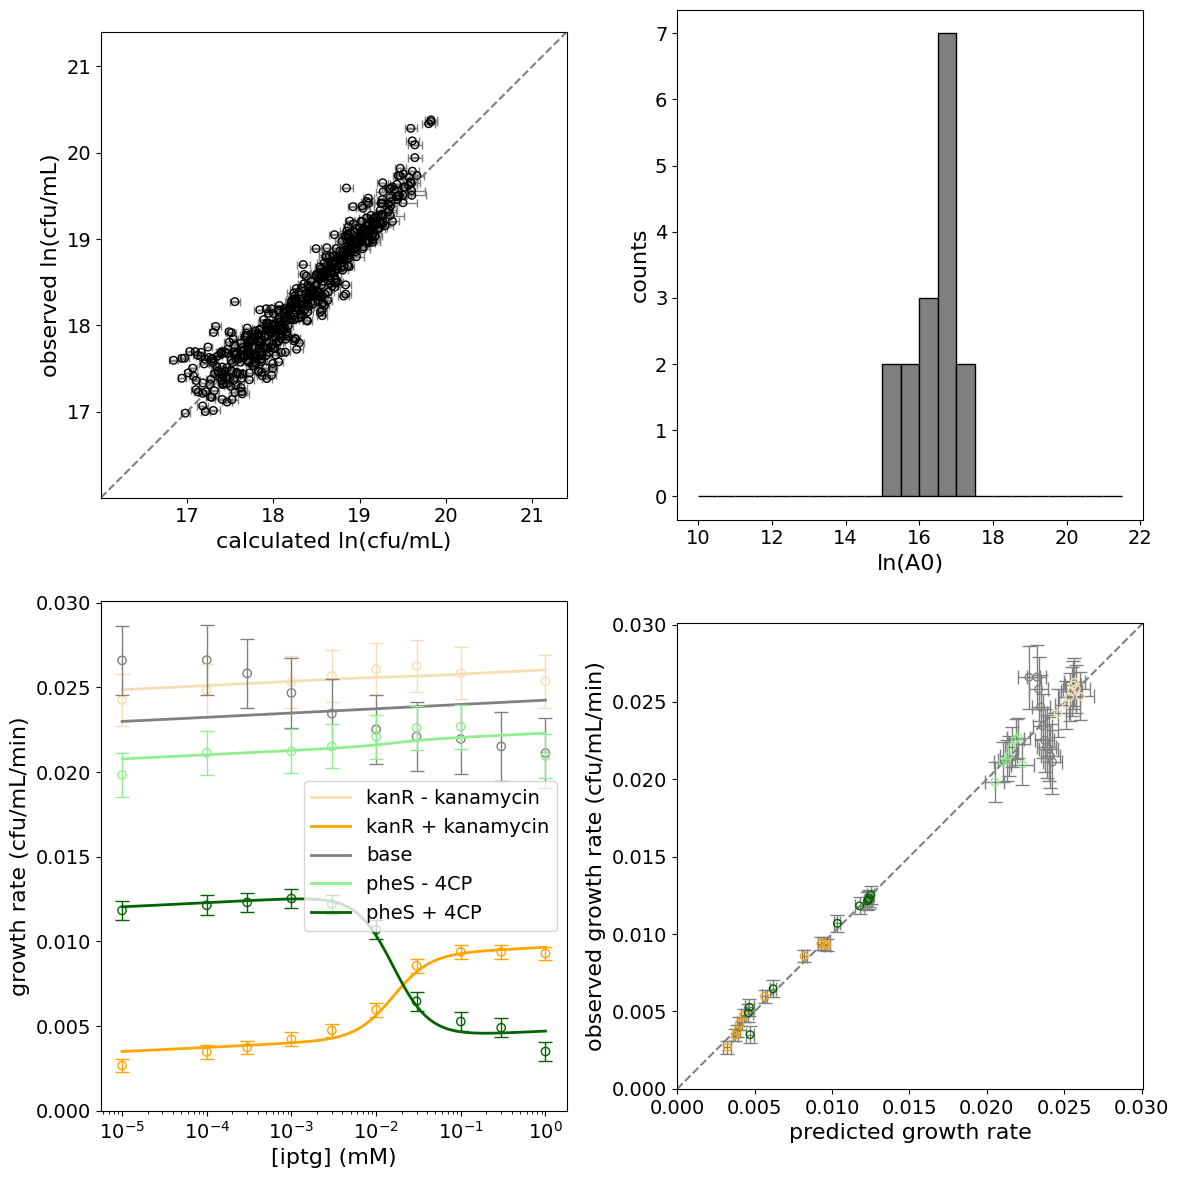

In [8]:
results = calibrate(calibration_file=df,
                    output_root="2025-08-27_calibration",
                    K=0.015854,
                    n=2,
                    log_iptg_offset=1e-6,
                    offset=0,
                    plot_fit=True)